<a href="https://colab.research.google.com/github/nirmit27/ml-notebooks/blob/main/DL/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dogs** vs. **Cats**
> #### Classification using **Transfer Learning**

### Importing the necessary modules

In [17]:
import os
from zipfile import ZipFile

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mplimg

from sklearn.model_selection import train_test_split as tts

from PIL import Image
from google.colab.patches import cv2_imshow

### Importing the dataset

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

mkdir: cannot create directory ‘/root/.kaggle’: File exists
... resuming from 527433728 bytes (325649675 bytes left) ...
100% 810M/814M [00:02<00:00, 133MB/s]
100% 814M/814M [00:02<00:00, 142MB/s]


#### Extracting the dataset from `.zip`

In [5]:
dpath = r"/content/dogs-vs-cats-redux-kernels-edition.zip"

with ZipFile(dpath, 'r') as zip:
  zip.extractall()

print("The dataset has been extracted!")

The dataset has been extracted!


#### Extracting the **training** and **testing** samples

In [8]:
train_path = r"/content/train.zip"
test_path = r"/content/test.zip"

with ZipFile(train_path, 'r') as zip1:
  zip1.extractall()

with ZipFile(test_path, 'r') as zip2:
  zip2.extractall()

print("The training and testing samples have been extracted.")

The training and testing samples have been extracted.


#### Enlisting the files in the samples
> The `files1` and `files2` lists hold the image titles.

In [16]:
tr_path = r"/content/train"
te_path = r"/content/test"

path1, dir1, files1 = next(os.walk(tr_path))
print(f"Number of TRAINING images : {len(files1)}")

path2, dir2, files2 = next(os.walk(te_path))
print(f"Number of TESTING images : {len(files2)}")

Number of TRAINING images : 25000
Number of TESTING images : 12500


### Image Processing

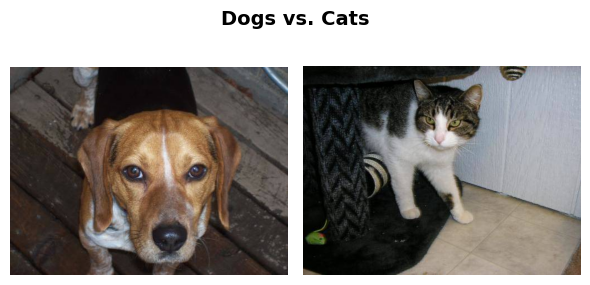

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
fig.suptitle("Dogs vs. Cats", fontweight='bold', fontsize=14)

img1 = mplimg.imread(f"{tr_path}/{files1[2]}")
img2 = mplimg.imread(f"{tr_path}/{files1[11]}")

axs[0].imshow(img1)
axs[0].axis("off")

axs[1].imshow(img2)
axs[1].axis("off")

plt.tight_layout()
plt.show()